## Global Power Plant Database 

Problem Statement:
Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Classification

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# Regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
# importing the Dataset

df=pd.read_csv("database_IND.csv")
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.shape

(907, 27)

In [5]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [22]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [23]:
# Acc to the info we have higher null values so droping some of the columns

df.drop(["latitude", "longitude", "other_fuel1", "other_fuel2",
       "other_fuel3", "commissioning_year", "owner","name",
       "geolocation_source", "wepp_id", "year_of_capacity_data",
       "generation_gwh_2013", "generation_gwh_2014", "generation_gwh_2015",
       "generation_gwh_2016", "generation_gwh_2017", "generation_gwh_2018",
       "generation_gwh_2019", "generation_data_source",
       "estimated_generation_gwh"], axis = 1, inplace=True)

In [24]:
df.head()

,country,country_long,gppd_idnr,capacity_mw,primary_fuel,source,url
0,IND,India,WRI1020239,2.5,Solar,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...
1,IND,India,WRI1019881,98.0,Coal,Ultratech Cement ltd,http://www.ultratechcement.com/
2,IND,India,WRI1026669,39.2,Wind,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...
3,IND,India,IND0000001,135.0,Gas,Central Electricity Authority,http://www.cea.nic.in/
4,IND,India,IND0000002,1800.0,Coal,Central Electricity Authority,http://www.cea.nic.in/


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       907 non-null    object 
 1   country_long  907 non-null    object 
 2   gppd_idnr     907 non-null    object 
 3   capacity_mw   907 non-null    float64
 4   primary_fuel  907 non-null    object 
 5   source        907 non-null    object 
 6   url           907 non-null    object 
dtypes: float64(1), object(6)
memory usage: 49.7+ KB


In [26]:
df.nunique().to_frame("Unique Values")

,Unique Values
country,1
country_long,1
gppd_idnr,907
capacity_mw,361
primary_fuel,8
source,191
url,304


In [28]:
# Converting the object datatype to float data type

#Label Encoder
le = LabelEncoder()
list1=['country','country_long','gppd_idnr','capacity_mw','primary_fuel','source','url']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))
df


,country,country_long,gppd_idnr,capacity_mw,primary_fuel,source,url
0,0,0,657,117,6,109,128
1,0,0,519,357,1,174,173
2,0,0,853,222,7,21,205
3,0,0,0,56,2,22,58
4,0,0,1,100,1,22,58
...,...,...,...,...,...,...,...
902,0,0,491,83,1,22,58
903,0,0,822,175,6,77,22
904,0,0,891,149,7,21,260
905,0,0,539,333,1,59,82


In [29]:
# EDA

df.skew()

country         0.000000
country_long    0.000000
gppd_idnr       0.000000
capacity_mw     0.013064
primary_fuel    0.472251
source          1.827373
url             1.510537
dtype: float64

In [33]:
z=np.abs(zscore(df))
threshold = 3
np.where(z>3)

(array([ 71,  80, 191, 299, 321, 345, 661, 669, 689, 832, 870, 871, 879,
        895, 900], dtype=int64),
 array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], dtype=int64))

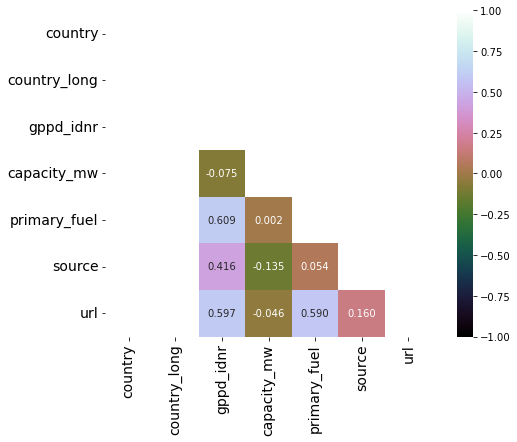

In [35]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(9,6))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cubehelix", mask=upper_triangle)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


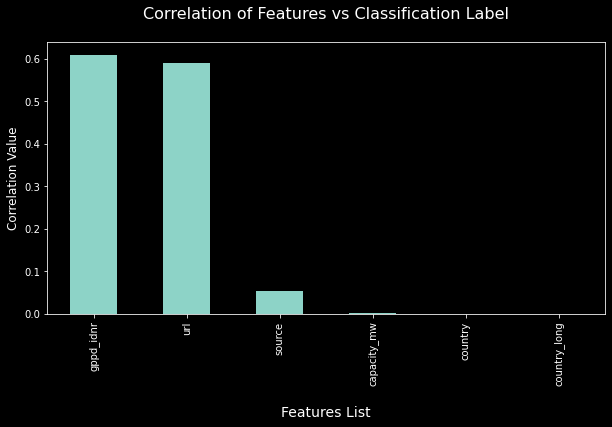

In [36]:
plt.style.use('dark_background')
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['primary_fuel'].sort_values(ascending=False).drop('primary_fuel').plot.bar()
plt.title("Correlation of Features vs Classification Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

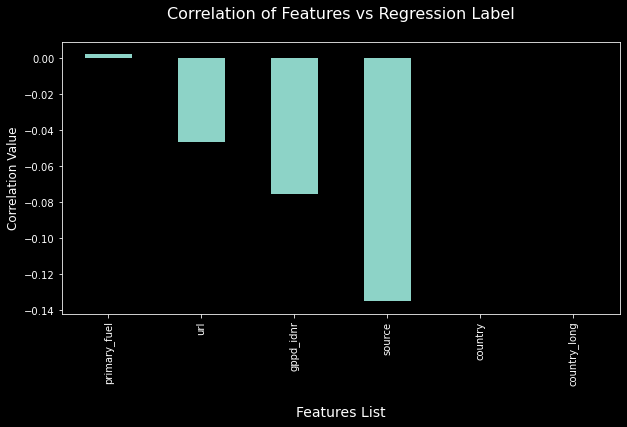

In [37]:
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['capacity_mw'].sort_values(ascending=False).drop('capacity_mw').plot.bar()
plt.title("Correlation of Features vs Regression Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

In [38]:
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)


Shape of the dataframe before removing outliers:  (907, 7)
Shape of the dataframe after removing outliers:  (0, 7)
Percentage of data loss post outlier removal:  100.0


In [39]:
df.corr()['primary_fuel'].sort_values()

capacity_mw     0.002102
source          0.053613
url             0.589886
gppd_idnr       0.609180
primary_fuel    1.000000
country              NaN
country_long         NaN
Name: primary_fuel, dtype: float64

In [40]:
df.corr()['capacity_mw'].sort_values()

source         -0.135287
gppd_idnr      -0.075317
url            -0.046483
primary_fuel    0.002102
capacity_mw     1.000000
country              NaN
country_long         NaN
Name: capacity_mw, dtype: float64

In [42]:
x=df.drop("primary_fuel", axis=1)
y=df["primary_fuel"]

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.22,random_state=43)

In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [48]:
# Gaussian NB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predict_gnb=gnb.predict(x_test)
print(accuracy_score(y_test,predict_gnb))
print(confusion_matrix(y_test,predict_gnb))
print(classification_report(y_test,predict_gnb))

0.6
[[ 6  1  0  0  0  0  0  0]
 [ 9  6  0 41  0  1  1  0]
 [ 2  0  0 17  0  0  2  0]
 [ 0  0  0 51  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 1  1  0  2  0  0  1  0]
 [ 0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0 30]]
              precision    recall  f1-score   support

           0       0.33      0.86      0.48         7
           1       0.75      0.10      0.18        58
           2       0.00      0.00      0.00        21
           3       0.46      1.00      0.63        51
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         5
           6       0.87      1.00      0.93        27
           7       1.00      1.00      1.00        30

    accuracy                           0.60       200
   macro avg       0.43      0.50      0.40       200
weighted avg       0.61      0.60      0.50       200



In [49]:
# Decision Tree Classification
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
pred_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,pred_dtc))
print(confusion_matrix(y_test,pred_dtc))
print(classification_report(y_test,pred_dtc))

0.61
[[ 3  1  3  0  0  0  0  0]
 [ 7 30  2 17  1  1  0  0]
 [ 0  7  3 10  0  1  0  0]
 [ 0 12  9 30  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  3  0  2  0  0  0  0]
 [ 0  0  0  0  1  0 26  0]
 [ 0  0  0  0  0  0  1 29]]
              precision    recall  f1-score   support

           0       0.30      0.43      0.35         7
           1       0.57      0.52      0.54        58
           2       0.18      0.14      0.16        21
           3       0.51      0.59      0.55        51
           4       0.33      1.00      0.50         1
           5       0.00      0.00      0.00         5
           6       0.96      0.96      0.96        27
           7       1.00      0.97      0.98        30

    accuracy                           0.61       200
   macro avg       0.48      0.58      0.51       200
weighted avg       0.60      0.61      0.60       200



In [50]:
kmn=KNeighborsClassifier(n_neighbors=5)
kmn.fit(x_train,y_train)
kmn.score(x_train,y_train)
pred_kmn=kmn.predict(x_test)
print(accuracy_score(y_test,pred_kmn))
print(confusion_matrix(y_test,pred_kmn))
print(classification_report(y_test,pred_kmn))

0.575
[[ 4  2  0  0  0  0  0  1]
 [ 7 29  0 21  0  1  0  0]
 [ 2  9  2  8  0  0  0  0]
 [ 0 19  8 24  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 1  4  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 26  1]
 [ 0  0  0  0  0  0  0 30]]
              precision    recall  f1-score   support

           0       0.29      0.57      0.38         7
           1       0.46      0.50      0.48        58
           2       0.20      0.10      0.13        21
           3       0.44      0.47      0.46        51
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         5
           6       1.00      0.96      0.98        27
           7       0.94      1.00      0.97        30

    accuracy                           0.57       200
   macro avg       0.42      0.45      0.42       200
weighted avg       0.55      0.57      0.56       200



In [52]:
# Logistic Regression
lr = LogisticRegression()
for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=i,test_size=0.7)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state", i,"The model perform very well")
        print("At random_state:-",i)
        print("Training accuracy score is ", round(accuracy_score(y_train,pred_train)*100,1))
        print("Training accuracy score is ", round(accuracy_score(y_test,pred_test)*100,1), '\n\n')

At random state 86 The model perform very well
At random_state:- 86
Training accuracy score is  50.7
Training accuracy score is  50.7 


At random state 412 The model perform very well
At random_state:- 412
Training accuracy score is  52.9
Training accuracy score is  52.9 


At random state 499 The model perform very well
At random_state:- 499
Training accuracy score is  49.6
Training accuracy score is  49.6 


At random state 550 The model perform very well
At random_state:- 550
Training accuracy score is  51.5
Training accuracy score is  51.5 


At random state 565 The model perform very well
At random_state:- 565
Training accuracy score is  54.0
Training accuracy score is  54.0 


At random state 680 The model perform very well
At random_state:- 680
Training accuracy score is  53.7
Training accuracy score is  53.7 


At random state 709 The model perform very well
At random_state:- 709
Training accuracy score is  52.9
Training accuracy score is  52.9 


At random state 842 The model

In [53]:
pred_lr = lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lsscore = cross_val_score(lr,x,y,cv=j)
    lsc = lsscore.mean()
    print("At cv: ",j)
    print("Cross validation score is ", lsc*100)
    print("Accuracy score is ", lss*100)
    print("\n")

At cv:  2
Cross validation score is  47.295319504818586
Accuracy score is  51.653543307086615


At cv:  3
Cross validation score is  49.390568195892435
Accuracy score is  51.653543307086615


At cv:  4
Cross validation score is  51.592530505633306
Accuracy score is  51.653543307086615


At cv:  5
Cross validation score is  50.04674883127922
Accuracy score is  51.653543307086615


At cv:  6
Cross validation score is  50.49305797606599
Accuracy score is  51.653543307086615


At cv:  7
Cross validation score is  50.26237328562909
Accuracy score is  51.653543307086615


At cv:  8
Cross validation score is  50.71029343269679
Accuracy score is  51.653543307086615


At cv:  9
Cross validation score is  50.601760176017606
Accuracy score is  51.653543307086615




In [54]:
lsscore_selected = cross_val_score(lr,x,y,cv=6).mean()
print("The cv score is ", lsscore_selected, "\nThe accuracy score is ", lss)

The cv score is  0.5049305797606599 
The accuracy score is  0.5165354330708661


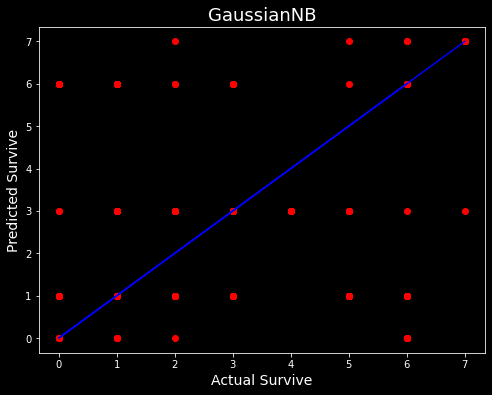

In [55]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Survive',fontsize=14)
plt.ylabel('Predicted Survive',fontsize=14)
plt.title('GaussianNB',fontsize=18)
plt.show()

In [56]:
# Data Modelling with objective capacity mw
df.corr()['capacity_mw'].sort_values()

source         -0.135287
gppd_idnr      -0.075317
url            -0.046483
primary_fuel    0.002102
capacity_mw     1.000000
country              NaN
country_long         NaN
Name: capacity_mw, dtype: float64

In [57]:
x=df.drop("capacity_mw", axis=1)
y=df["capacity_mw"]

In [58]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [59]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=43)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print(f"At random state {i}, the training accuracy is {r2_score(y_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0, the training accuracy is 0.03235214618975102
At random state 0, the testing accuracy is -0.03044511647840098


At random state 1, the training accuracy is 0.03235214618975102
At random state 1, the testing accuracy is -0.03044511647840098


At random state 2, the training accuracy is 0.03235214618975102
At random state 2, the testing accuracy is -0.03044511647840098


At random state 3, the training accuracy is 0.03235214618975102
At random state 3, the testing accuracy is -0.03044511647840098


At random state 4, the training accuracy is 0.03235214618975102
At random state 4, the testing accuracy is -0.03044511647840098


At random state 5, the training accuracy is 0.03235214618975102
At random state 5, the testing accuracy is -0.03044511647840098


At random state 6, the training accuracy is 0.03235214618975102
At random state 6, the testing accuracy is -0.03044511647840098


At random state 7, the training accuracy is 0.03235214618975102
At random state 7, the tes

In [60]:
parameters = {'alpha':[.001, .01, .1, 1, 10], 'random_state': list(range(0,10))}
ls = Lasso()
clf= GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [61]:
ls=Lasso(alpha=10,random_state=0)
ls.fit(x_train,y_train)
ls_score_training=ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)
ls_score_training*100

3.0776138088480787

In [62]:
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss*100

-3.0432449651013993

In [63]:
cv_score = cross_val_score(ls,x,y,cv=5)
cv_mean = cv_score.mean()
cv_mean*100

1.0747699493098728

In [64]:

parameters = {'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [65]:
rf = RandomForestRegressor(criterion="mse",max_features="sqrt")
rf.fit(x_train, y_train)
rf.score(x_train,y_train)
pred_decision = rf.predict(x_test)

rfs = r2_score(y_test,pred_decision) 
print('R2 Score: ',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=5)
rfc = rfscore.mean()
print('Cross Val Score: ',rfc*100)

R2 Score:  -38.804788545908785
Cross Val Score:  -29.662162268188418
